Accuracy:  82.8125
Report               precision    recall  f1-score   support

           0       0.83      0.93      0.88       130
           1       0.81      0.61      0.70        62

    accuracy                           0.83       192
   macro avg       0.82      0.77      0.79       192
weighted avg       0.83      0.83      0.82       192

Confusion Matrix [[121   9]
 [ 24  38]]


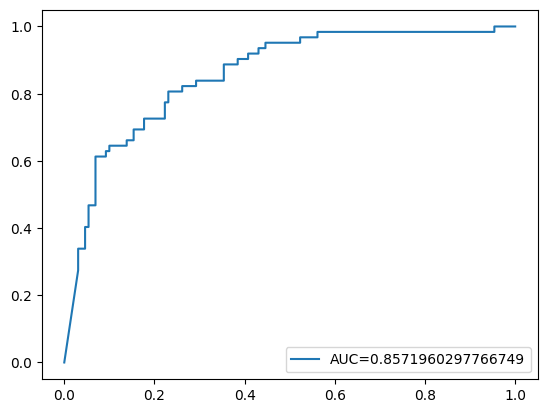

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

#dataset load
data = pd.read_csv('C:\\Users\\MuxtorovicH\\Desktop\\diabetes.csv')
#data preparation
x = data.drop('Outcome', axis=1)
y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

#data preprocessing
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#model creation
model = MLPClassifier(hidden_layer_sizes=1, max_iter=500, random_state=0)
#model training
model.fit(x_train, y_train)
#predict
y_pred = model.predict(x_test)
#evaluation
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy * 100)

report = metrics.classification_report(y_test, y_pred)
print('Report', report)

matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix', matrix)

y_pred_proba = model.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC={str(auc)}")
plt.legend(loc=4)
plt.show()

### Neural network implementation from scratch


In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('C:\\Users\\MuxtorovicH\\Desktop\\diabetes.csv')

# Prepare data
x = data.drop('Outcome', axis=1)
y = data['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Data preprocessing
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


class NeuralNetworkFromScratch:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        self.weights1 = np.random.rand(input_size, hidden_size1)
        self.bias1 = np.zeros((1, hidden_size1))
        self.weights2 = np.random.rand(hidden_size1, hidden_size2)
        self.bias2 = np.zeros((1, hidden_size2))
        self.weights3 = np.random.rand(hidden_size2, output_size)
        self.bias3 = np.zeros((1, output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def forward(self, x):
        self.hidden1 = self.sigmoid(np.dot(x, self.weights1) + self.bias1)
        self.hidden2 = self.sigmoid(np.dot(self.hidden1, self.weights2) + self.bias2)
        self.output = self.sigmoid(np.dot(self.hidden2, self.weights3) + self.bias3)
        return self.output

    def backward(self, x, y, learning_rate):
        error_output = y - self.output
        d_output = error_output * self.sigmoid_derivative(self.output)
        error_hidden2 = d_output.dot(self.weights3.T)
        d_hidden2 = error_hidden2 * self.sigmoid_derivative(self.hidden2)
        error_hidden1 = d_hidden2.dot(self.weights2.T)
        d_hidden1 = error_hidden1 * self.sigmoid_derivative(self.hidden1)

        self.weights3 += self.hidden2.T.dot(d_output) * learning_rate
        self.bias3 += np.sum(d_output, axis=0, keepdims=True) * learning_rate

        self.weights2 += self.hidden1.T.dot(d_hidden2) * learning_rate
        self.bias2 += np.sum(d_hidden2, axis=0, keepdims=True) * learning_rate

        self.weights1 += x.T.dot(d_hidden1) * learning_rate
        self.bias1 += np.sum(d_hidden1, axis=0, keepdims=True) * learning_rate

    def fit(self, x, y, learning_rate, epochs):
        for epoch in range(epochs):
            output = self.forward(x)
            self.backward(x, y, learning_rate)
            if epoch % 100 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch} loss: {loss}")

    def predict(self, x):
        return np.round(self.forward(x))


# Model parameters
input_layer_size = x_train.shape[1]
hidden_layer_size1 = 10  # Example size
hidden_layer_size2 = 10  # Example size
output_layer_size = 1
learning_rate = 0.01
epochs = 1000

# Create and train the model
model = NeuralNetworkFromScratch(input_layer_size, hidden_layer_size1, hidden_layer_size2, output_layer_size)
model.fit(x_train, y_train.to_numpy().reshape(-1, 1), learning_rate, epochs)

# Predict and evaluate
y_pred = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy * 100)

report = metrics.classification_report(y_test, y_pred)
print('Report:\n', report)

matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', matrix)


# y_pred_proba = model.predict_proba(x_test)[::, 1]
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
# auc = metrics.roc_auc_score(y_test, y_pred_proba)
# plt.plot(fpr, tpr, label=f"AUC={str(auc)}")
# plt.legend(loc=4)
# plt.show()

Epoch 0 loss: 0.5911590532511897
Epoch 100 loss: 0.1933625464311709
Epoch 200 loss: 0.16206972849552725
Epoch 300 loss: 0.15705396854117537
Epoch 400 loss: 0.15513629712854804
Epoch 500 loss: 0.15269440746415758
Epoch 600 loss: 0.14986337012461698
Epoch 700 loss: 0.14705821925624304
Epoch 800 loss: 0.1442659491808883
Epoch 900 loss: 0.1406987183174095
Accuracy:  75.0
Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       130
           1       0.64      0.52      0.57        62

    accuracy                           0.75       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.74      0.75      0.74       192

Confusion Matrix:
 [[112  18]
 [ 30  32]]


In [40]:
y_pred_train = model.predict(x_train)
acc = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy", acc * 100)

Accuracy 83.15972222222221


### Test_accuracy=73 || Train_accuracy=95   --> Overfitting

###   Test_accuracy=78 || Train_accuracy=82   --> Underfitting